# Exploratory Data Analysis 
The aim of this Exploratory Data Analysis (EDA) is to gain a comprehensive understanding of the dataset and identify any potential outliers that could impact our data analysis in the future.

### These are the columns we are going to be dealing with in our data
- Type: The type of transaction
- Amount: The amount of money transferred
- NameOrig: The origin account name
- OldBalanceOrg: The origin accounts balance before the transaction
- NewBalanceOrg: The origin accounts balance after the transaction
- NameDest: The destination account name
- OldbalanceDest: The destination accounts balance before the transaction
- NewbalanceDest: The destination accounts balance after the transaction
- IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD)
- IsFraud: Was this simulated transaction actually fraudulent? In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a 	   victim’s bank account before the account owner could secure their information.


In [1]:
# Importing all the libraries we will use in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
# We will extract the data from the csv and since we are dealing with large amount of data we are going to just take a sample.
df = pd.read_csv("C:/Users/Alex/Desktop/TKH Files/TKH TLabs/data/Fraud.csv")
sample_df = df.sample(n=500000)
sample_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5549422,382,TRANSFER,379453.11,C1061345664,31422.00,0.00,C1689924026,75788.79,455241.90,0,0
5690744,397,CASH_IN,177098.04,C1525977689,11975.00,189073.04,C224885983,323824.20,146726.16,0,0
6206164,586,CASH_IN,351188.50,C1414394320,7172624.34,7523812.83,C559116000,1211076.40,859887.90,0,0
863909,42,PAYMENT,944.06,C805085413,397.00,0.00,M1729018687,0.00,0.00,0,0
4151293,303,CASH_OUT,130893.68,C766204875,10104.00,0.00,C803168252,483982.46,614876.14,0,0


In [17]:
# Let's remind ourselves of the data types we are working with
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 5549422 to 4006320
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
 10  isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 45.8+ MB


In [18]:
#We are going to check for missing values in the dataset
sample_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
#We are going to check the summary statistics of the dataset
sample_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,500000.000000,500000.000000
mean,243.246182,1.786819e+05,8.377373e+05,8.589840e+05,1.099866e+06,1.222655e+06,0.001308,0.000004
std,142.409703,5.825376e+05,2.900082e+06,2.936193e+06,3.441719e+06,3.698123e+06,0.036143,0.002000
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.339506e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.498835e+04,1.447400e+04,0.000000e+00,1.317017e+05,2.140617e+05,0.000000,0.000000
75%,334.000000,2.089401e+05,1.074725e+05,1.439926e+05,9.352754e+05,1.107805e+06,0.000000,0.000000
max,743.000000,6.173376e+07,5.731626e+07,4.731626e+07,3.279630e+08,3.555534e+08,1.000000,1.000000


### Initial Thoughts 

Given the large volume of data we're handling, our objective is to avoid using an excessive amount that could overwhelm our system and potentially lead to a computer crash.

In our dataset, we notice a relatively low occurrence of object types. This characteristic is advantageous as it simplifies the process of graphing the data.

We will exclude the columns 'isFraud' and 'isFlaggedFraud' from our analysis since they are our target variables. This will help us avoid confusion and gain a clearer insight into how the remaining data demonstrates patterns.

### Univariate Analysis


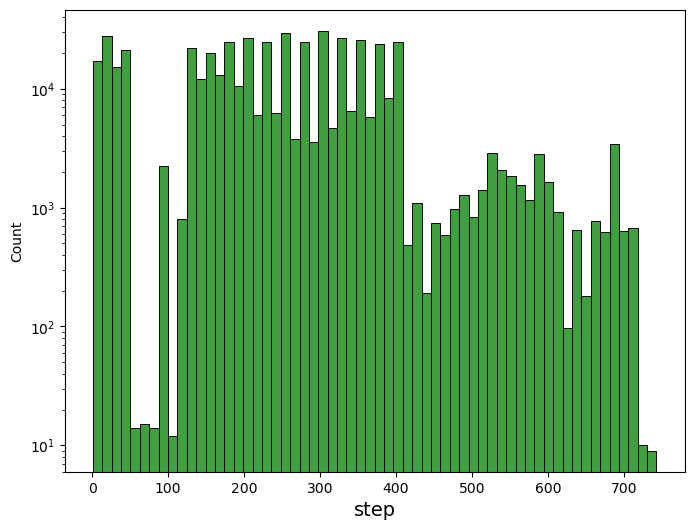

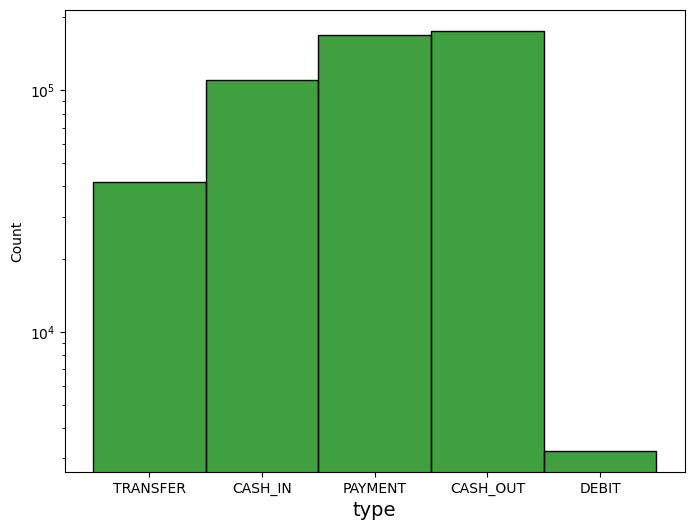

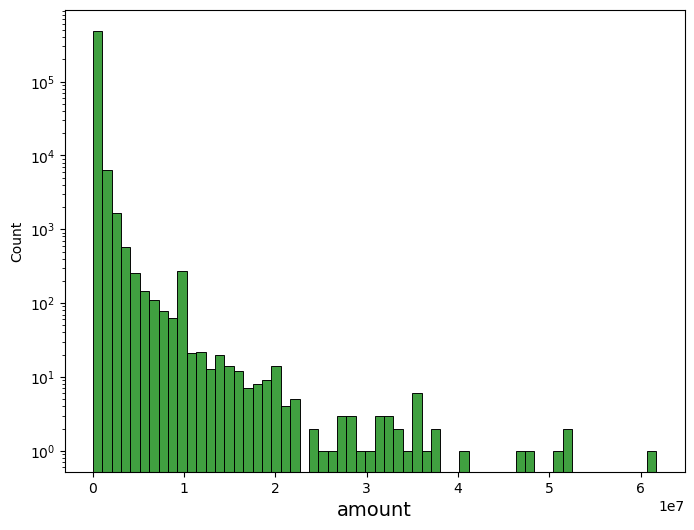

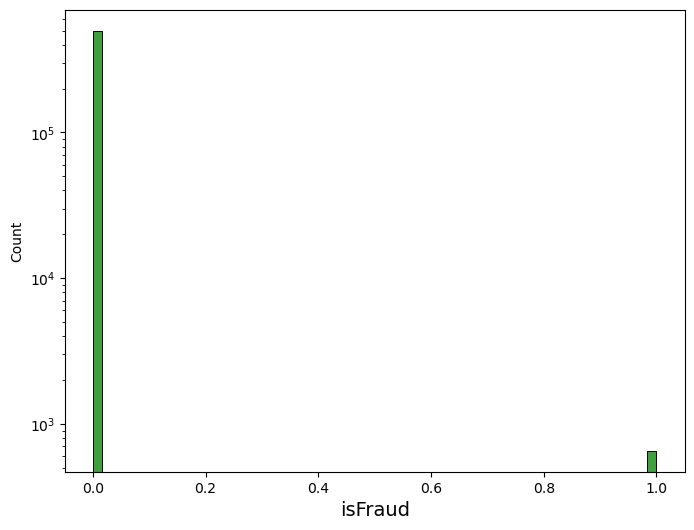

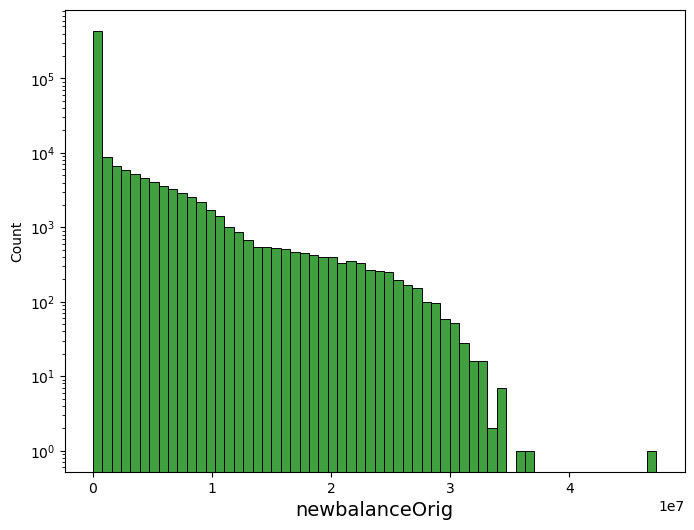

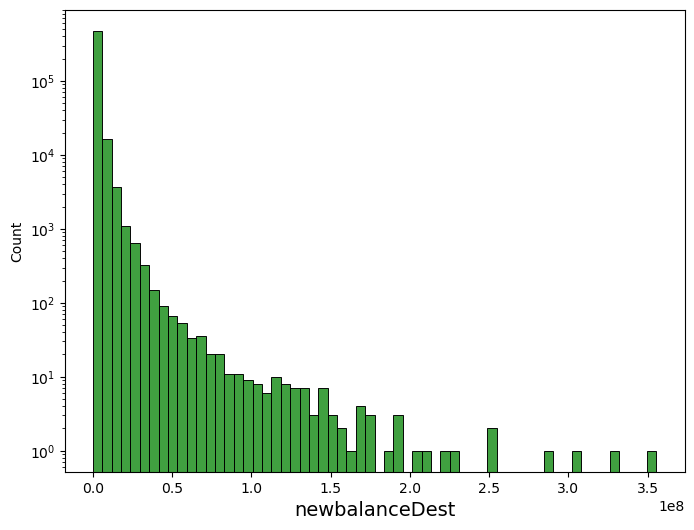

In [20]:
#We are going to create a list of the features we are going to use in the analysis and then we will use a for loop to create a histogram for each feature
features = ['step', 'type', 'amount','isFraud','newbalanceOrig','newbalanceDest' ]

for i in features:
	plt.figure(figsize=[8, 6])
	sns.histplot(sample_df[i], bins= 60, kde = False, color = "green")
	plt.xlabel(i, fontsize = 14)
	plt.ylabel("Count")
	plt.yscale("log")
	plt.show()
	

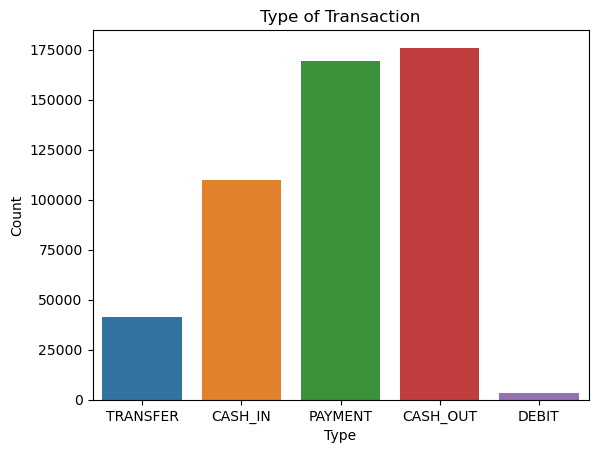

In [21]:
sns.countplot(x='type', data=sample_df)
plt.title('Type of Transaction')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


As we progress through our data analysis, we observe outliers in some of the graphs. Furthermore, concerning transaction types, there appears to be a higher number of people using cash out and payment methods for their transactions.

### Bivariant Exploratory Analysis 
Let's explore the relationship of multiple varaibles in this dataset


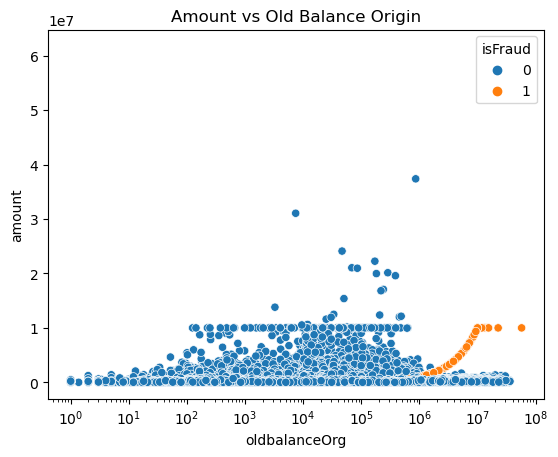

In [22]:
#We are going to create a scatter plot to see the relationship between the amount and old balance origin
sns.scatterplot(x='oldbalanceOrg', y='amount', data=sample_df, hue='isFraud')
plt.title('Amount vs Old Balance Origin')
plt.xscale('log')

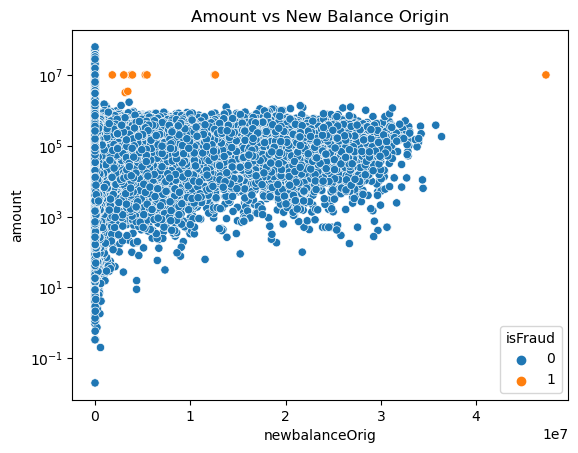

In [23]:
# We are going to create a scatter plot to see the relationship between the amount and new balance origin
sns.scatterplot(x='newbalanceOrig', y='amount', data=sample_df, hue='isFraud')
plt.title('Amount vs New Balance Origin')
plt.yscale('log')

<Axes: xlabel='amount', ylabel='newbalanceDest'>

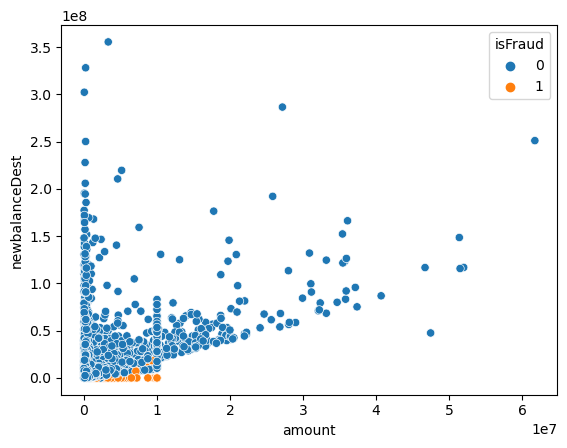

In [24]:
sns.scatterplot(x='amount', y='newbalanceDest', data=sample_df, hue='isFraud')

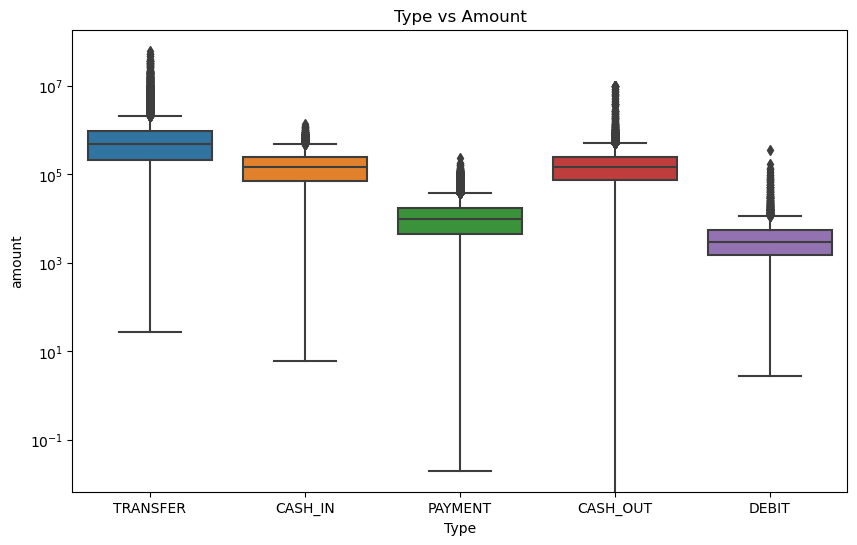

In [25]:
# We are going to create a scatter plot to see the relationship between the amount and old balance destination
plt.figure(figsize=[10, 6])
sns.boxplot(x='type', y='amount', data=sample_df)
plt.title('Type vs Amount')
plt.xlabel('Type')
plt.yscale('log')
plt.show()

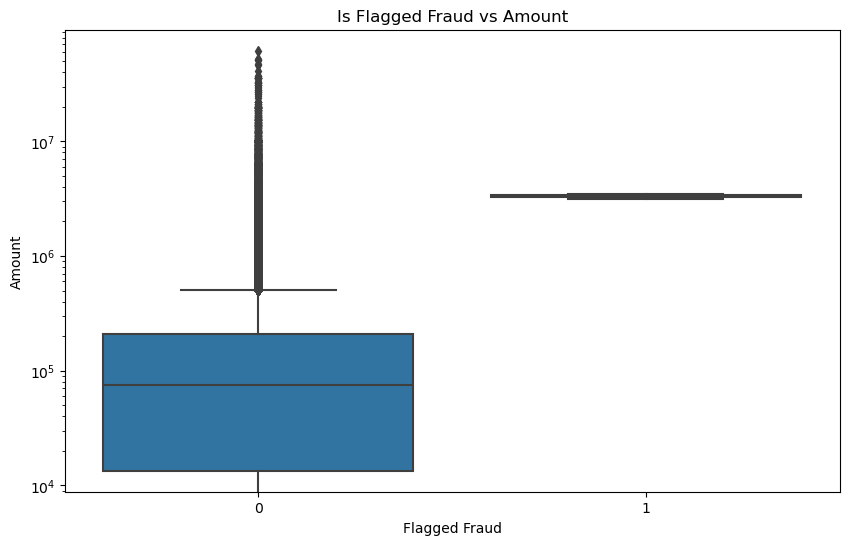

In [26]:
# We are going to create a boxplot to see the relationship between the amount and new balance destination
plt.figure(figsize=[10, 6])
sns.boxplot(x='isFlaggedFraud', y='amount', data=sample_df)
plt.title('Is Flagged Fraud vs Amount')
plt.xlabel('Flagged Fraud')
plt.ylabel('Amount')
plt.yscale('log')
plt.show()


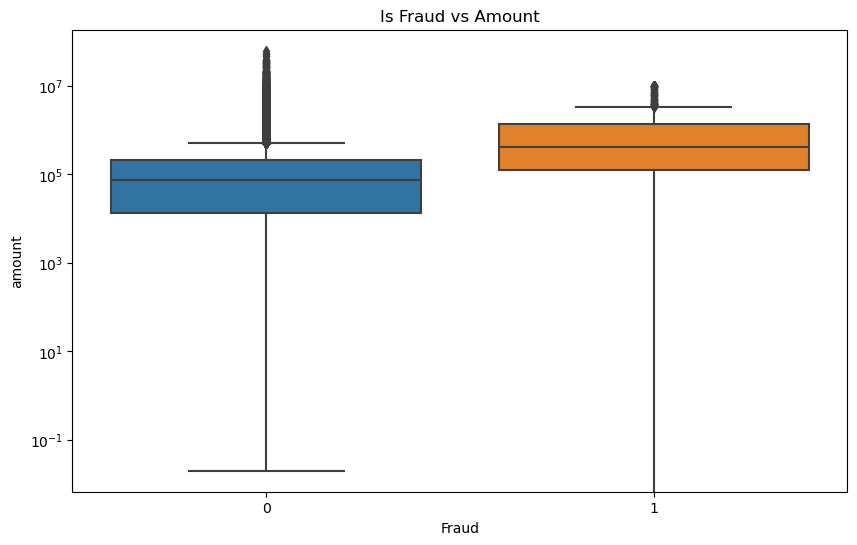

In [27]:
# We are going to create a boxplot to see the relationship between the amount and isFraud
plt.figure(figsize=[10, 6])
sns.boxplot(x='isFraud', y='amount', data=sample_df)
plt.title('Is Fraud vs Amount')
plt.xlabel('Fraud')
plt.yscale('log')
plt.show()


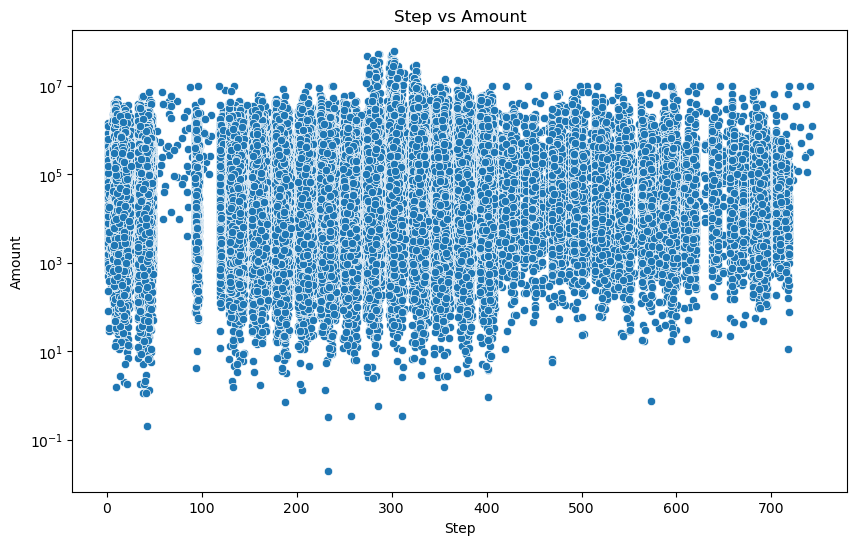

In [28]:
# We are going to create a scatter plot to see the relationship between the amount and step
plt.figure(figsize=[10, 6])
sns.scatterplot(x='step', y='amount', data=sample_df)
plt.title('Step vs Amount')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.yscale('log')
plt.show()

### Multivariante


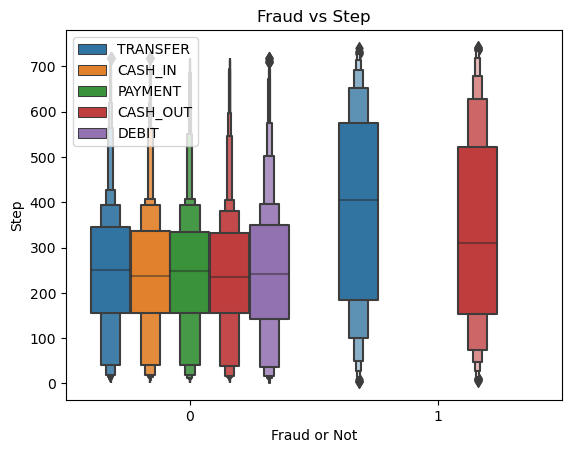

In [29]:
# We are going to create a boxplot to see the relationship between the amount and step
sns.boxenplot(x='isFraud', y='step', data=sample_df, hue='type')
plt.legend(loc='upper left')
plt.xlabel('Fraud or Not')
plt.ylabel('Step')
plt.title('Fraud vs Step')
plt.show()
